In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset= pd.read_csv('medals_total.csv')

In [3]:
dataset

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,38,42,42,122
1,CHN,38,27,24,89
2,AUS,18,18,14,50
3,JPN,18,12,13,43
4,FRA,16,24,22,62
...,...,...,...,...,...
87,PUR,0,0,1,1
88,QAT,0,0,1,1
89,SGP,0,0,1,1
90,SVK,0,0,1,1


In [4]:
# Data Preprocessing ..

dataset.head()

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,38,42,42,122
1,CHN,38,27,24,89
2,AUS,18,18,14,50
3,JPN,18,12,13,43
4,FRA,16,24,22,62


In [16]:
dataset.dtypes

country_code    object
Gold Medal       int64
Silver Medal     int64
Bronze Medal     int64
Total            int64
dtype: object

In [17]:
dataset.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total
count,92.000000,92.000000,92.000000,92.000000
mean,3.402174,3.413043,3.978261,10.793478
std,6.613439,6.445293,6.390202,18.909000
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,5.000000
75%,3.000000,3.000000,4.250000,8.000000
max,38.000000,42.000000,42.000000,122.000000


In [6]:
dataset_columns=dataset[['country_code','Gold Medal','Silver Medal','Bronze Medal','Total']]

In [13]:
dataset_columns.isnull().sum()

country_code    0
Gold Medal      0
Silver Medal    0
Bronze Medal    0
Total           0
dtype: int64

In [14]:
# encoding for catagorical column - country_code 

data_encoded = pd.get_dummies(dataset_columns, columns=['country_code'], drop_first=True)

In [64]:
data_encoded

,Gold Medal,Silver Medal,Bronze Medal,Total,country_code_ALB,country_code_ALG,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,...,country_code_THA,country_code_TJK,country_code_TPE,country_code_TUN,country_code_TUR,country_code_UGA,country_code_UKR,country_code_USA,country_code_UZB,country_code_ZAM
0,38,42,42,122,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,27,24,89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,18,14,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18,12,13,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,24,22,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# feature selection

X = data_encoded.drop('Total', axis=1)
y = data_encoded['Total']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# model training 

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
#Predictions 

y_pred = model.predict(X_test)

future_predictions = model.predict(X)

In [72]:
# added prediction feature in orignial dataset

dataset['Predicted_Total_2028'] = future_predictions


print(dataset[['country_code', 'Total', 'Predicted_Total_2028']])


   country_code  Total  Predicted_Total_2028
0           USA    122                 70.01
1           CHN     89                 76.51
2           AUS     50                 49.29
3           JPN     43                 40.68
4           FRA     62                 63.24
..          ...    ...                   ...
87          PUR      1                  1.00
88          QAT      1                  1.00
89          SGP      1                  1.00
90          SVK      1                  1.00
91          ZAM      1                  1.00

[92 rows x 3 columns]


In [73]:
# Accuracy - mean squared error and R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 144.6463842105263
R-squared: 0.8230640258200055


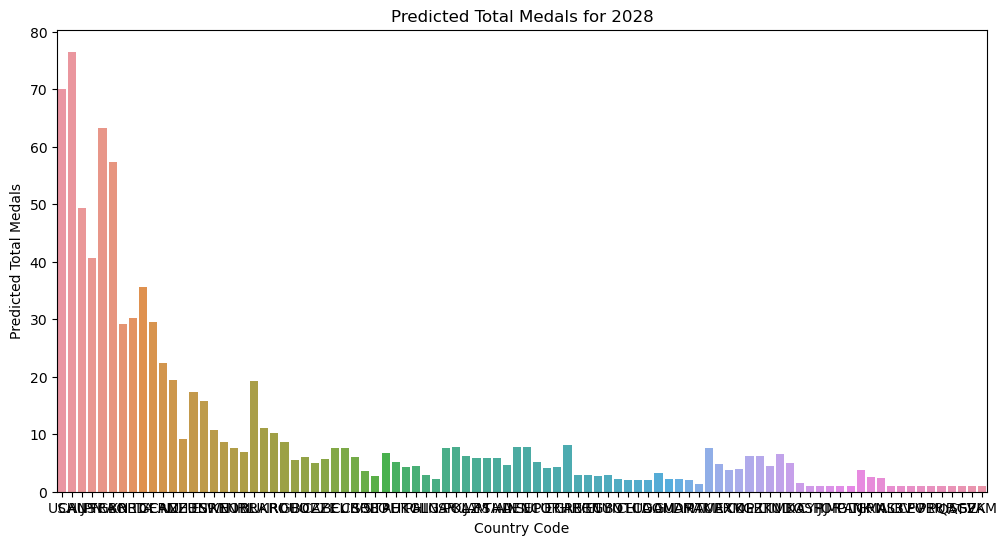

In [74]:
# Plot result

plt.figure(figsize=(12, 6))
sns.barplot(x='country_code', y='Predicted_Total_2028', data=dataset)

plt.title('Predicted Total Medals for 2028')
plt.xlabel('Country Code')
plt.ylabel('Predicted Total Medals')


plt.show()


In [109]:
# rounding the resulted values ..

dataset[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']] = dataset[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']].round({'Gold Medal': 0, 'Silver Medal': 0, 'Bronze Medal': 0, 'Total': 0, 'Predicted_Total_2028': 0})

In [110]:
# Saving result to csv file ..

dataset[['country_code','Gold Medal','Silver Medal','Bronze Medal', 'Total', 'Predicted_Total_2028']].to_csv('olympics_medal_predictions_2028.csv', index=False)

In [88]:
# Outlier detection using IQR..


Q1 = dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']].quantile(0.25)
Q3 = dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']].quantile(0.75)


IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [89]:
outliers = (dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']] < lower_limit) | (dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']] > upper_limit)

<Axes: title={'center': 'Boxplot for Medal Counts with Outliers Highlighted'}, xlabel='Medal Type', ylabel='Total_Medals'>

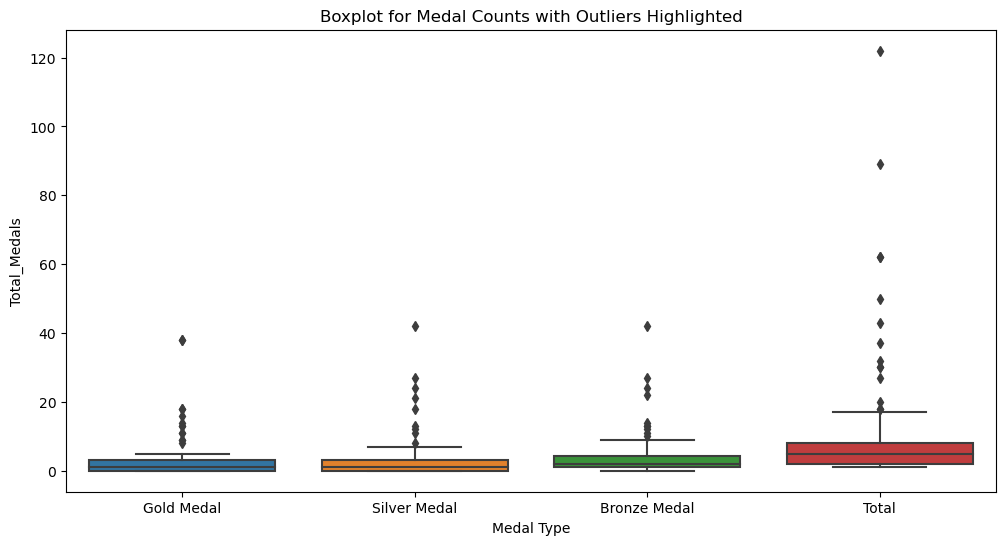

In [91]:
plt.figure(figsize=(12, 6))
plt.title('Boxplot for Medal Counts with Outliers Highlighted')
plt.xlabel('Medal Type')
plt.ylabel('Total_Medals')
sns.boxplot(data=dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']])


In [92]:
# Remove outliers ..
cleaned_data = dataset[~outliers_iqr.any(axis=1)]


print("Cleaned dataset without outliers:")
print(cleaned_data)

Cleaned dataset without outliers:
   country_code  Gold Medal  Silver Medal  Bronze Medal  Total  \
14          ESP           5             4             8     17   
15          SWE           4             4             3     11   
16          KEN           4             2             4     10   
17          NOR           4             1             3      8   
18          IRL           4             0             3      7   
..          ...         ...           ...           ...    ...   
87          PUR           0             0             1      1   
88          QAT           0             0             1      1   
89          SGP           0             0             1      1   
90          SVK           0             0             1      1   
91          ZAM           0             0             1      1   

    Predicted_Total_2028  
14                 15.76  
15                 10.65  
16                  8.73  
17                  7.58  
18                  6.91  
..         

In [93]:
X_clean = cleaned_data .drop(columns=['Total', 'country_code'])
y_clean = cleaned_data ['Total']

In [94]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [97]:
# model training ..

model_clean = RandomForestRegressor(n_estimators=100, random_state=42)

model_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = model_clean.predict(X_test_clean)

In [98]:
# Predictions ..
future_predictions_clean = model_clean.predict(X_clean)

In [99]:
cleaned_data['Predicted_Total_2028'] = future_predictions_clean

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15988\3066604462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Predicted_Total_2028'] = future_predictions_clean


In [100]:
print(cleaned_data[['country_code', 'Total', 'Predicted_Total_2028']])

   country_code  Total  Predicted_Total_2028
14          ESP     17                 11.00
15          SWE     11                 10.62
16          KEN     10                  9.44
17          NOR      8                  7.66
18          IRL      7                  6.61
..          ...    ...                   ...
87          PUR      1                  1.00
88          QAT      1                  1.00
89          SGP      1                  1.00
90          SVK      1                  1.00
91          ZAM      1                  1.00

[77 rows x 3 columns]


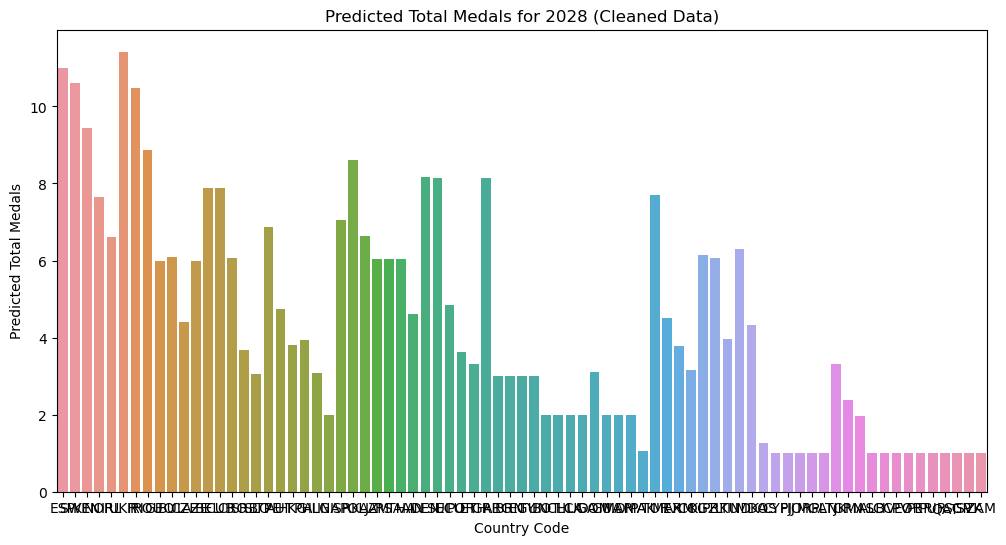

In [101]:
# Plot result ..

plt.figure(figsize=(12, 6))
sns.barplot(x='country_code', y='Predicted_Total_2028', data=cleaned_data)

plt.title('Predicted Total Medals for 2028 (Cleaned Data)')
plt.xlabel('Country Code')
plt.ylabel('Predicted Total Medals')

plt.show()


In [106]:
# rounding the result values ..

cleaned_data[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']] = cleaned_data[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']].round({'Gold Medal': 0, 'Silver Medal': 0, 'Bronze Medal': 0, 'Total': 0, 'Predicted_Total_2028': 0})


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15988\2028713529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']] = cleaned_data[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Predicted_Total_2028']].round({'Gold Medal': 0, 'Silver Medal': 0, 'Bronze Medal': 0, 'Total': 0, 'Predicted_Total_2028': 0})


In [107]:
cleaned_data[['country_code','Gold Medal','Silver Medal','Bronze Medal', 'Total', 'Predicted_Total_2028']].to_csv('without_outliers_olympics_medal_predictions_2028.csv', index=False)

In [104]:
print('As per prediction analysis using Random Forest Regressor - India predicts 6.55 total medals with outliers and without outliers - 6.3')

As per prediction analysis using Random Forest Regressor - India predicts 6.55 total medals with outliers and without outliers - 6.3
